In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#load dataset
df=pd.read_csv(r"C:\Users\HP\Downloads\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
#data cleaning
features=["Sex","Age","Fare","Pclass","Embarked"]
X=df[features]
y=df["Survived"]
#Dropping rows with missing values using Drop NA

X = X.dropna()
y = y.loc[X.index]

In [26]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Preprocessing + Modeling

num_features = ["Age", "Fare"]
cat_features = ["Sex", "Pclass", "Embarked"]

#Transformers

num_transformer = Pipeline(steps=[("scaler", StandardScaler())])

cat_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

#Column Transformer

preprocessor = ColumnTransformer(transformers =[("num", num_transformer, num_features),
                                                ("cat", cat_transformer, cat_features)])

#Logistic Regression Pipeline

clf = Pipeline(steps=[("preprocessor", preprocessor),
                      ("model", LogisticRegression(max_iter=1000))])

clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Pclass',
                                                   'Embarked'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [28]:
#Predictions + Metrics

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

results = pd.DataFrame({"Metric": ["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
                        "Score": [acc, prec, rec, f1, roc]})
results


,Metric,Score
0,Accuracy,0.797203
1,Precision,0.869565
2,Recall,0.634921
3,F1,0.733945
4,ROC-AUC,0.817659


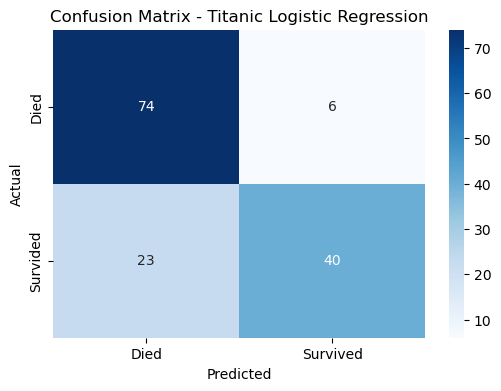

In [29]:
#Confusion Matrix Plot

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survided"], ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix - Titanic Logistic Regression")

fig.savefig("titanic_confusion.png", dpi=150, bbox_inches="tight")
plt.show()

In [30]:
#Exporting Results to MD
results.to_markdown(r"C:\Users\HP\titanic_results.md", index=False)
plt.savefig("titanic.png",dpi=150)

<Figure size 640x480 with 0 Axes>